In [5]:
#Step 1: Import Libraries and Load Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



file_path = '/content/Global YouTube Statistics.csv'


data = pd.read_csv(file_path, encoding='ISO-8859-1')
print("File loaded successfully!")
print(data.head())



File loaded successfully!
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india           

In [6]:
# Step 2: Preprocessing

print("\nMissing Values:")
print(data.isnull().sum())


data.fillna(0, inplace=True)


columns_to_numeric = ['subscribers', 'video views', 'uploads', 'lowest_monthly_earnings',
                      'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings',
                      'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']
for col in columns_to_numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')



Missing Values:
rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                               

<ipython-input-7-31b824cee649>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subscribers', y='Youtuber', data=top_10_channels, palette='Blues_r')


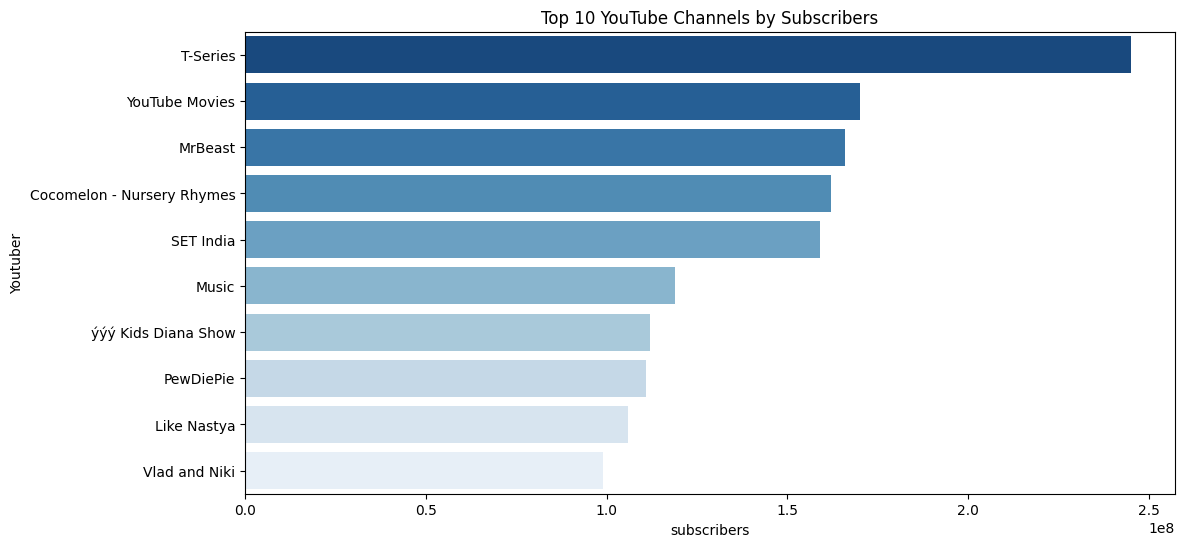

In [7]:
# Step 3: Analysis
# 1. Top 10 YouTube Channels by Subscribers

top_10_channels = data.nlargest(10, 'subscribers')
plt.figure(figsize=(12, 6))
sns.barplot(x='subscribers', y='Youtuber', data=top_10_channels, palette='Blues_r')
plt.title('Top 10 YouTube Channels by Subscribers')
plt.show()


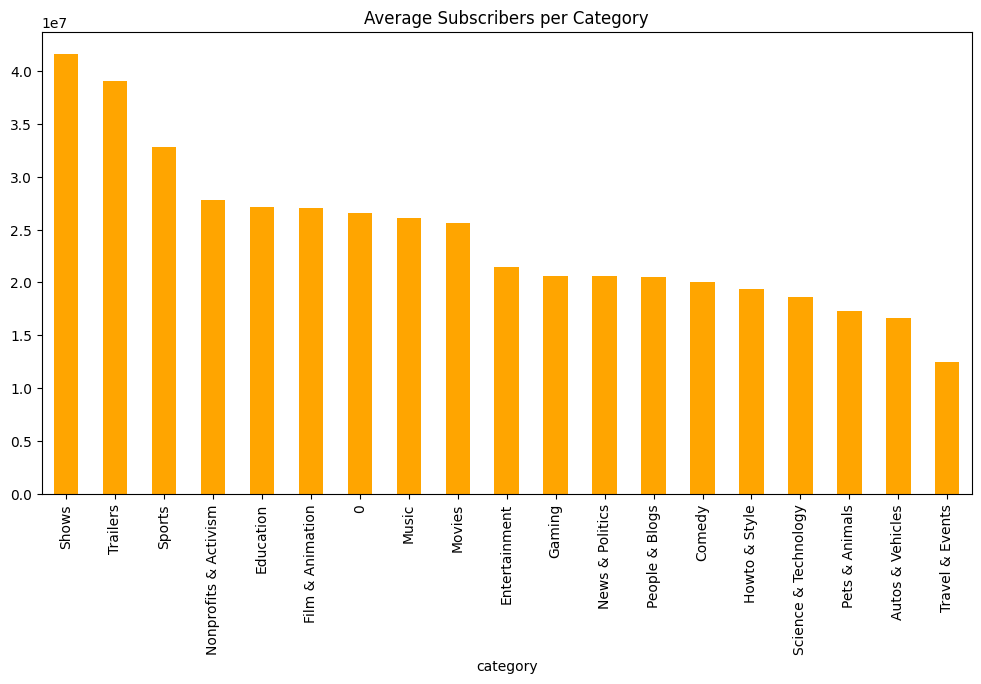

In [8]:
# 2. Category with the Highest Average Subscribers
avg_subscribers = data.groupby('category')['subscribers'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_subscribers.plot(kind='bar', color='orange')
plt.title('Average Subscribers per Category')
plt.show()


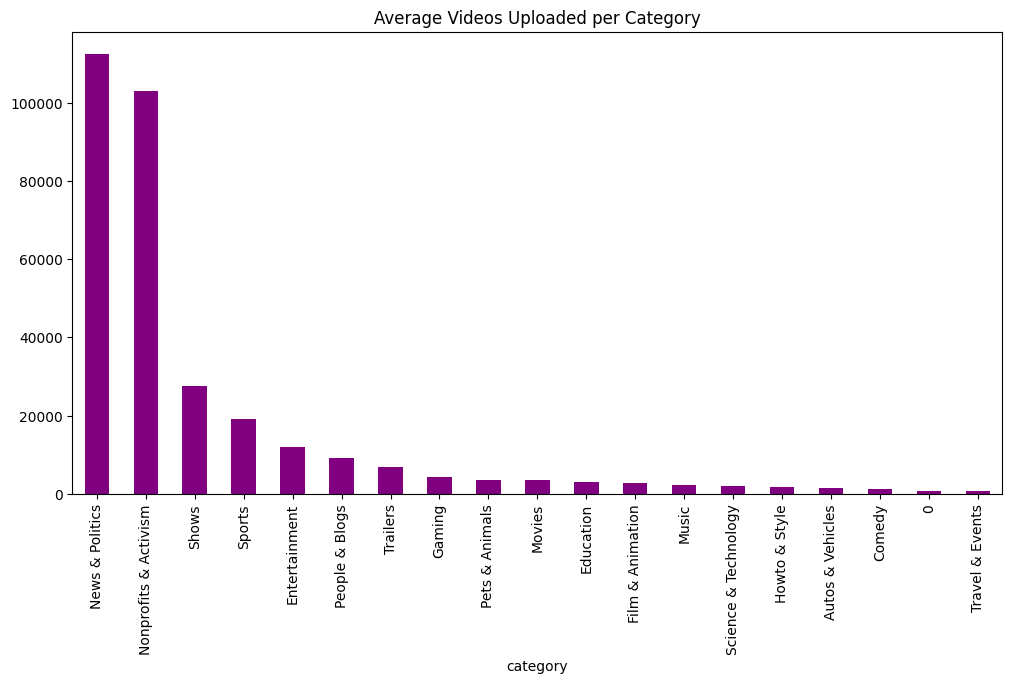

In [9]:
# 3. Average Videos Uploaded in Each Category

avg_uploads = data.groupby('category')['uploads'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_uploads.plot(kind='bar', color='purple')
plt.title('Average Videos Uploaded per Category')
plt.show()


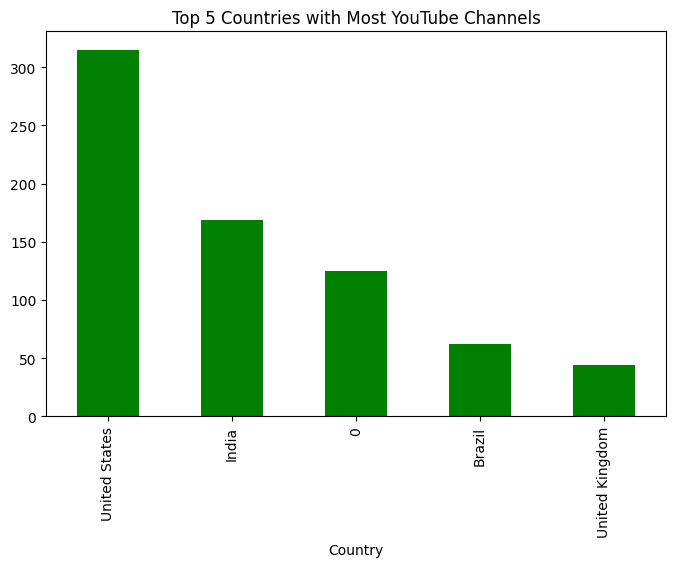

In [10]:
# 4. Top 5 Countries with the Most YouTube Channels
top_5_countries = data['Country'].value_counts().head(5)
plt.figure(figsize=(8, 5))
top_5_countries.plot(kind='bar', color='green')
plt.title('Top 5 Countries with Most YouTube Channels')
plt.show()


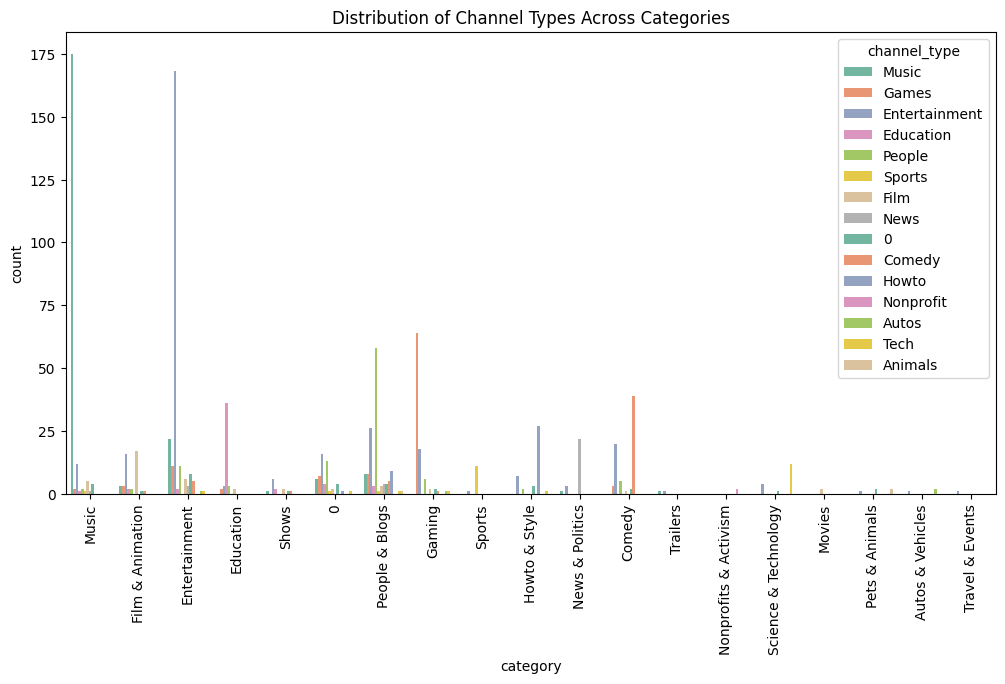

In [11]:
# 5. Distribution of Channel Types Across Categories
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='channel_type', data=data, palette='Set2')
plt.title('Distribution of Channel Types Across Categories')
plt.xticks(rotation=90)
plt.show()


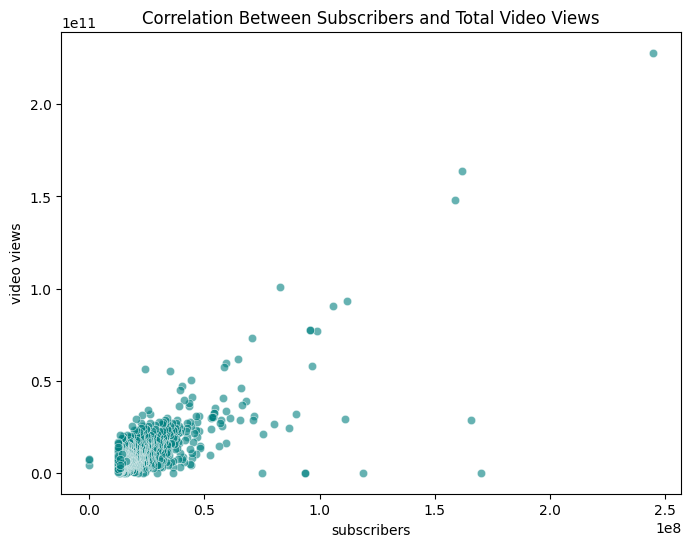

In [12]:
# 6. Correlation Between Subscribers and Video Views
plt.figure(figsize=(8, 6))
sns.scatterplot(x='subscribers', y='video views', data=data, color='teal', alpha=0.6)
plt.title('Correlation Between Subscribers and Total Video Views')
plt.show()


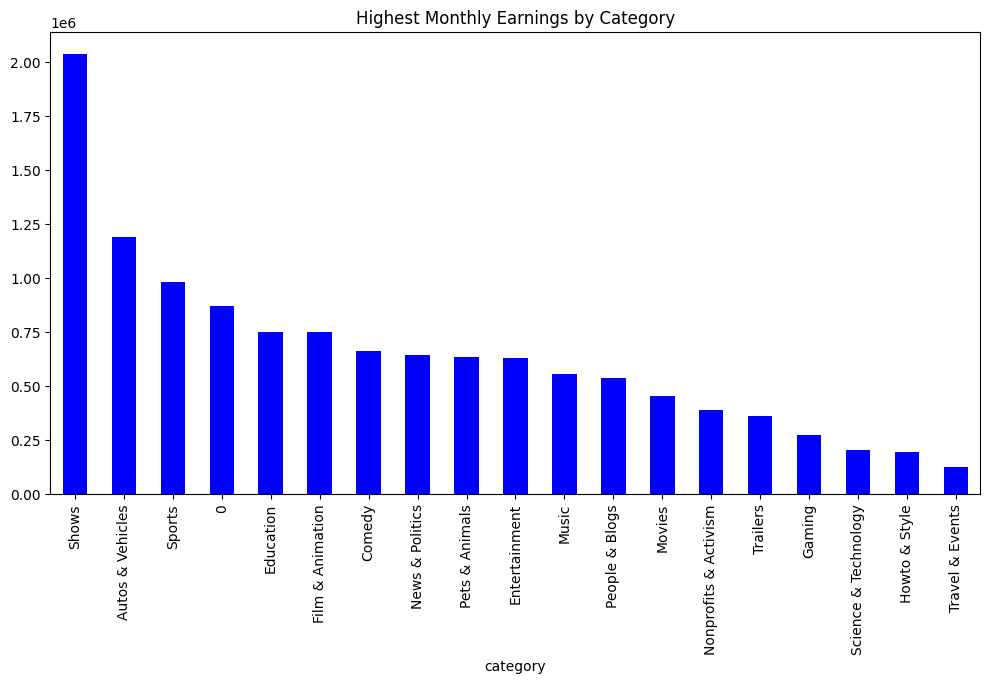

In [13]:
# 7. Monthly Earnings Variation by Category
monthly_earnings = data.groupby('category')['highest_monthly_earnings'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
monthly_earnings.plot(kind='bar', color='blue')
plt.title('Highest Monthly Earnings by Category')
plt.show()


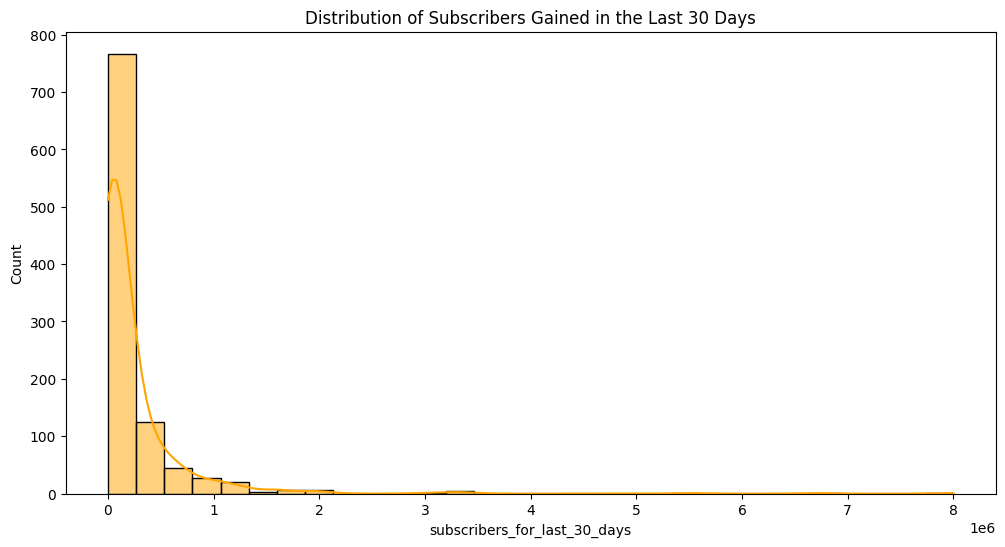

In [14]:
# 8. Subscribers Gained in the Last 30 Days
plt.figure(figsize=(12, 6))
sns.histplot(data['subscribers_for_last_30_days'], bins=30, kde=True, color='orange')
plt.title('Distribution of Subscribers Gained in the Last 30 Days')
plt.show()


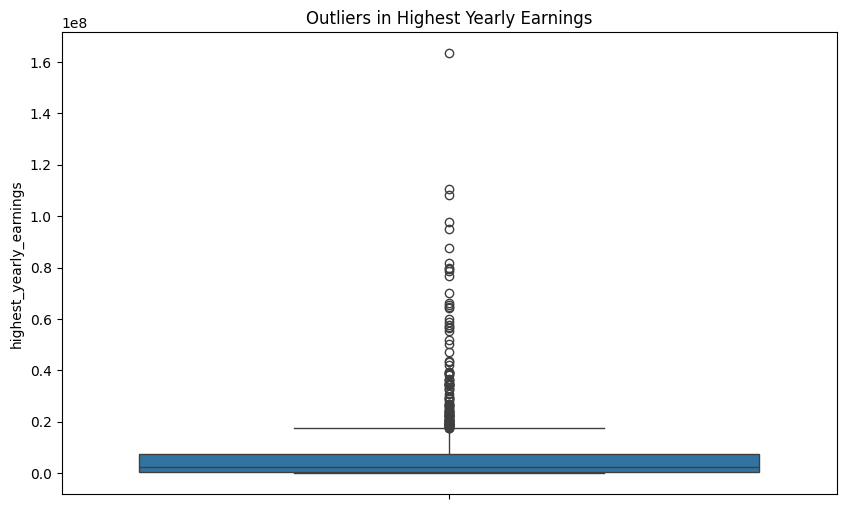

In [15]:
# 9. Outliers in Yearly Earnings
plt.figure(figsize=(10, 6))
sns.boxplot(y='highest_yearly_earnings', data=data)
plt.title('Outliers in Highest Yearly Earnings')
plt.show()


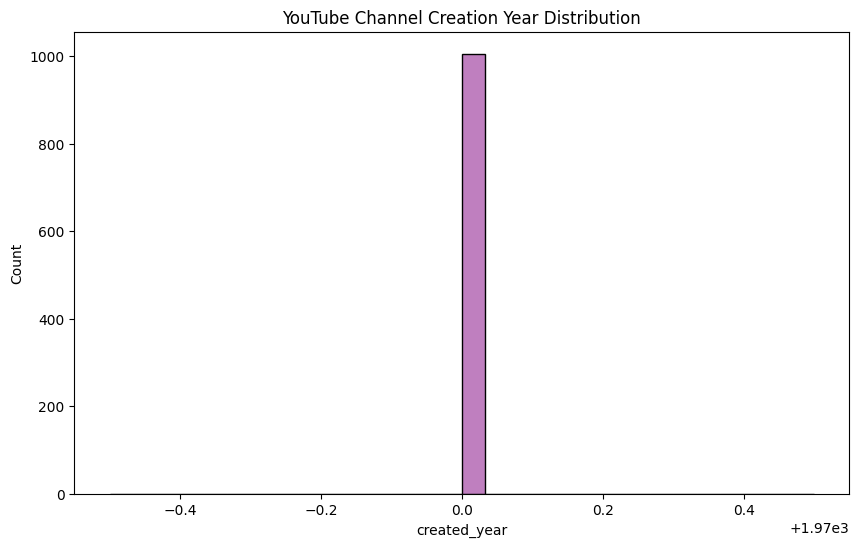

In [16]:
# 10. Channel Creation Date Distribution
data['created_year'] = pd.to_datetime(data['created_date'], errors='coerce').dt.year
plt.figure(figsize=(10, 6))
sns.histplot(data['created_year'].dropna(), bins=30, kde=True, color='purple')
plt.title('YouTube Channel Creation Year Distribution')
plt.show()


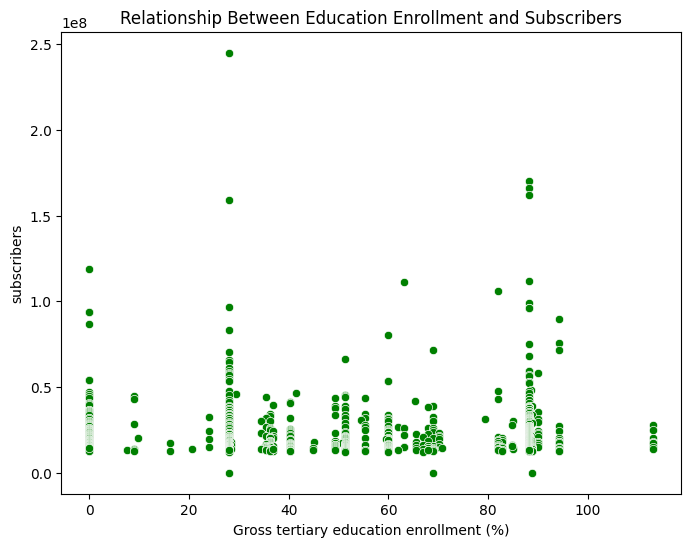

In [17]:
# 11. Relationship Between Education Enrollment and Number of Channels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gross tertiary education enrollment (%)', y='subscribers', data=data, color='green')
plt.title('Relationship Between Education Enrollment and Subscribers')
plt.show()


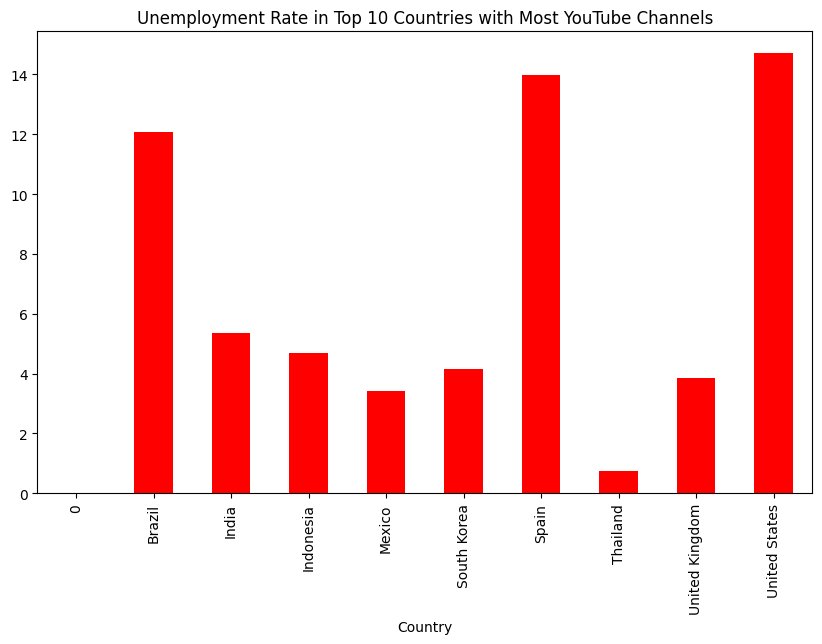

In [18]:
# 12. Unemployment Rate for Top 10 Countries
top_10_countries = data['Country'].value_counts().head(10).index
unemployment_rate = data[data['Country'].isin(top_10_countries)].groupby('Country')['Unemployment rate'].mean()

plt.figure(figsize=(10, 6))
unemployment_rate.plot(kind='bar', color='red')
plt.title('Unemployment Rate in Top 10 Countries with Most YouTube Channels')
plt.show()


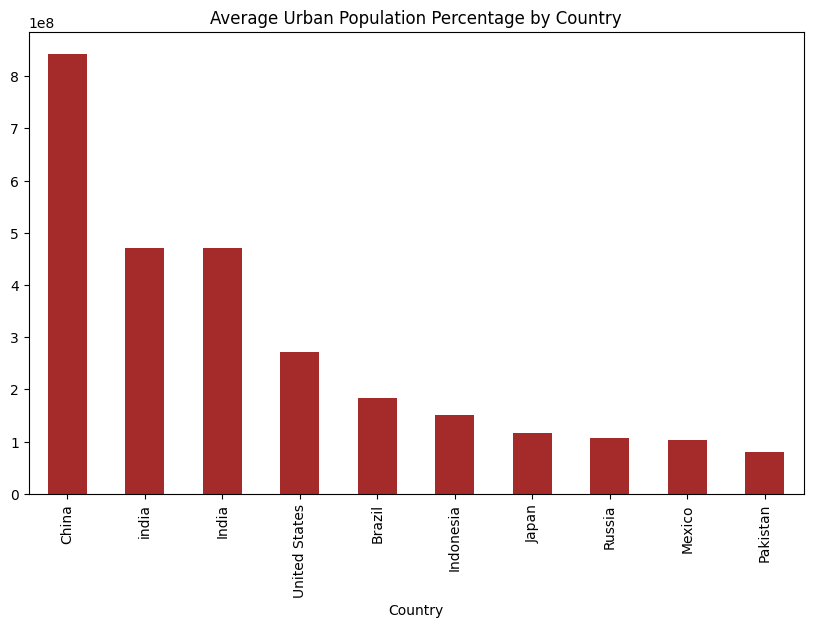

In [19]:
# 13. Average Urban Population Percentage
urban_population = data.groupby('Country')['Urban_population'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
urban_population.plot(kind='bar', color='brown')
plt.title('Average Urban Population Percentage by Country')
plt.show()


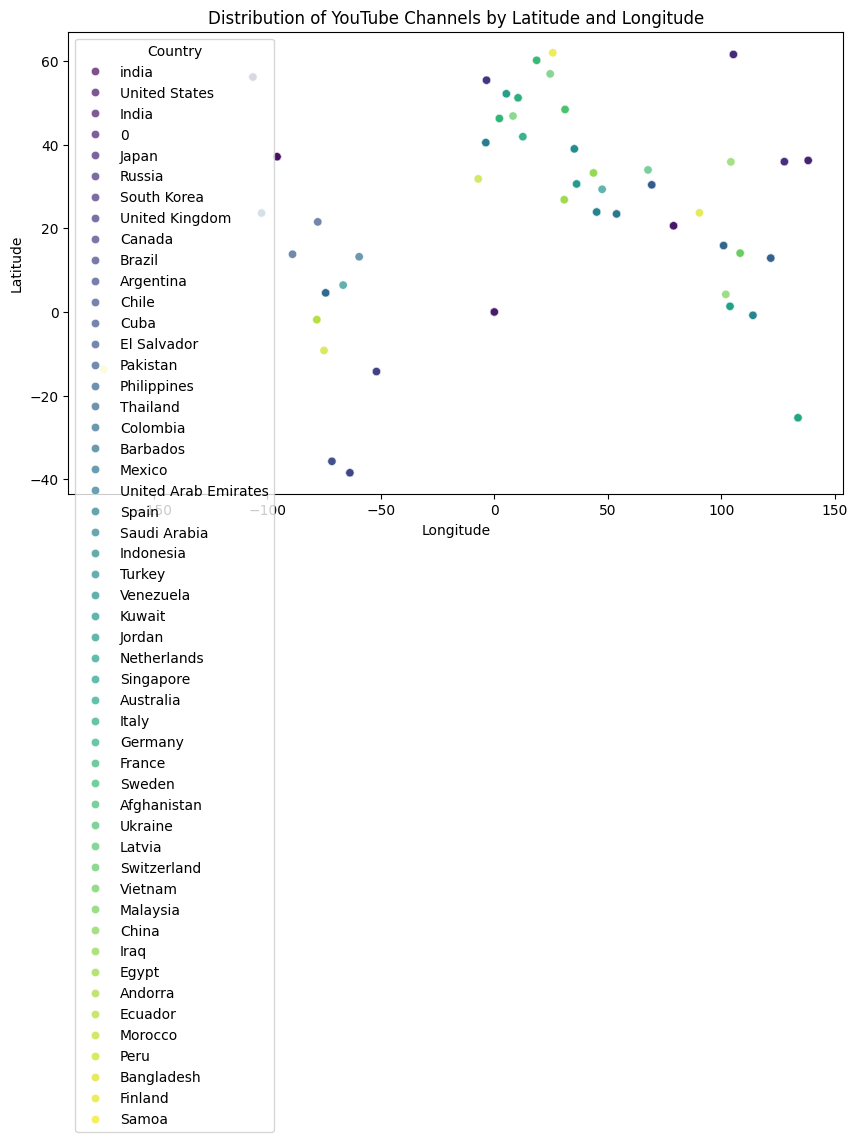

In [20]:
# 14. YouTube Channels Based on Latitude and Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Country', data=data, palette='viridis', alpha=0.7)
plt.title('Distribution of YouTube Channels by Latitude and Longitude')
plt.show()


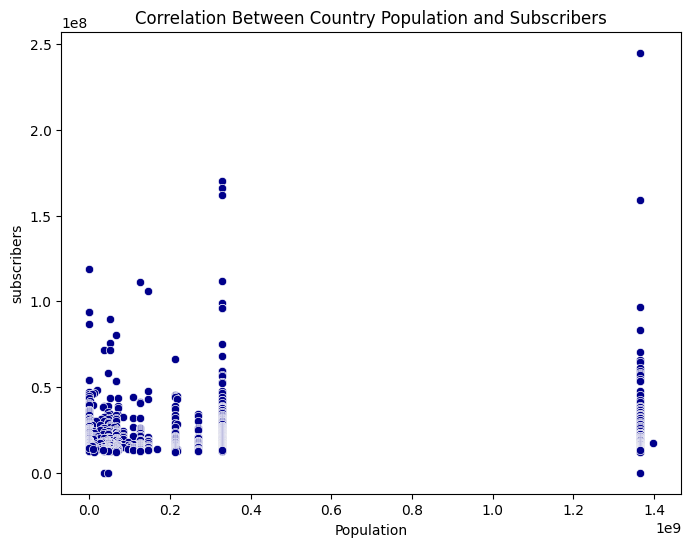

In [21]:
# 15. Correlation Between Subscribers and Population
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Population', y='subscribers', data=data, color='darkblue')
plt.title('Correlation Between Country Population and Subscribers')
plt.show()


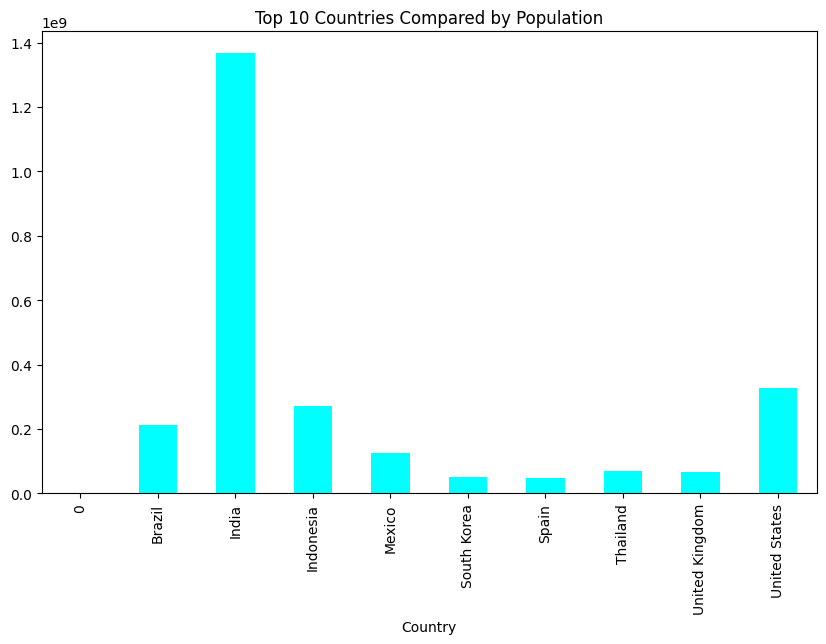

In [22]:
# 16. Top 10 Countries Compared by Total Population
top_10_population = data[data['Country'].isin(top_10_countries)].groupby('Country')['Population'].mean()

plt.figure(figsize=(10, 6))
top_10_population.plot(kind='bar', color='cyan')
plt.title('Top 10 Countries Compared by Population')
plt.show()


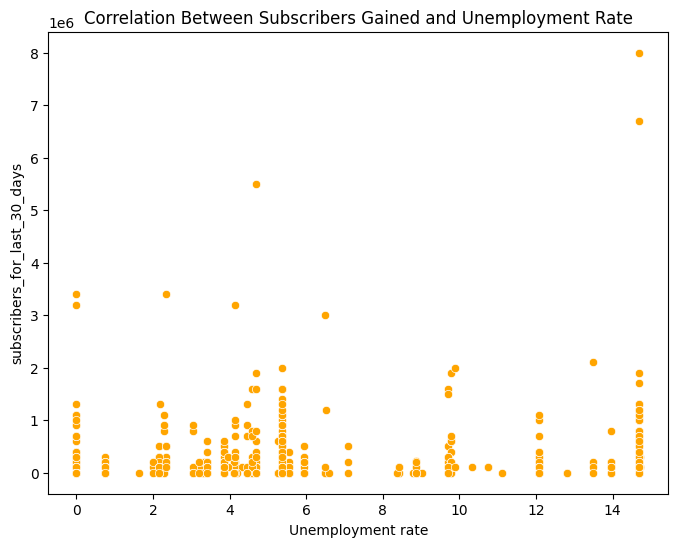

In [23]:
# 17. Correlation Between Subscribers Gained and Unemployment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Unemployment rate', y='subscribers_for_last_30_days', data=data, color='orange')
plt.title('Correlation Between Subscribers Gained and Unemployment Rate')
plt.show()


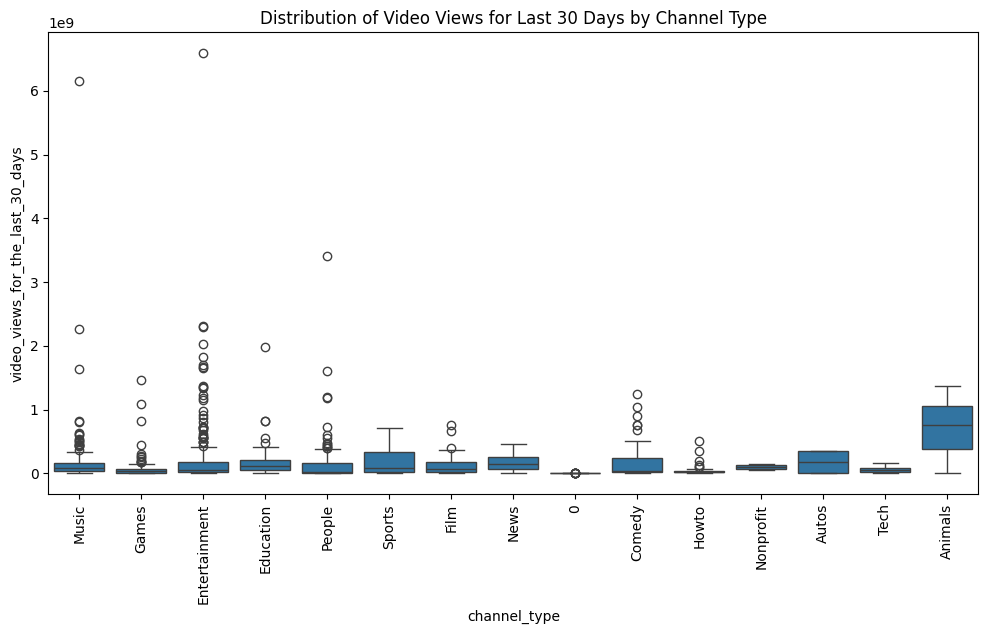

In [24]:
# 18. Video Views for Last 30 Days by Channel Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='channel_type', y='video_views_for_the_last_30_days', data=data)
plt.title('Distribution of Video Views for Last 30 Days by Channel Type')
plt.xticks(rotation=90)
plt.show()


<ipython-input-30-ec0372cccef8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='count', data=full_data, palette='Purples_r')


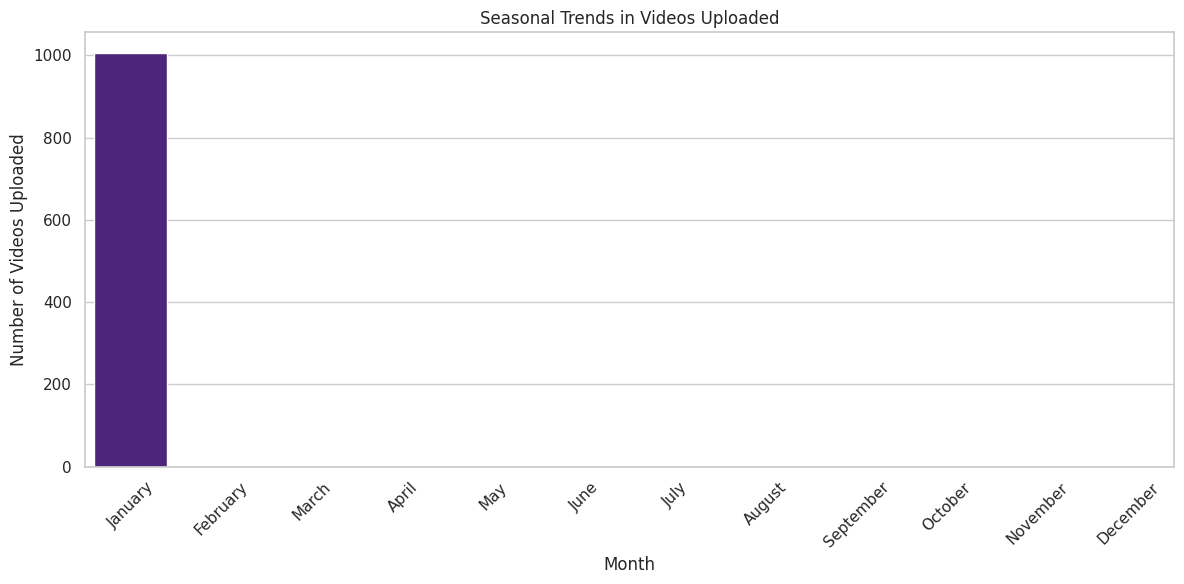

In [30]:
# 19. Seasonal Trends in Videos Uploaded


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with invalid dates
data_clean = data.dropna(subset=['created_month'])

# Ensure all months (1–12) are represented
all_months = pd.DataFrame({'created_month': np.arange(1, 13)})
month_counts = data_clean['created_month'].value_counts().reset_index()
month_counts.columns = ['created_month', 'count']

# Merge to ensure all months are included
full_data = all_months.merge(month_counts, on='created_month', how='left').fillna(0)

# Sort by month and add month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
full_data['month_name'] = month_names

# Plot the corrected bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='month_name', y='count', data=full_data, palette='Purples_r')

plt.title('Seasonal Trends in Videos Uploaded')
plt.xlabel('Month')
plt.ylabel('Number of Videos Uploaded')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


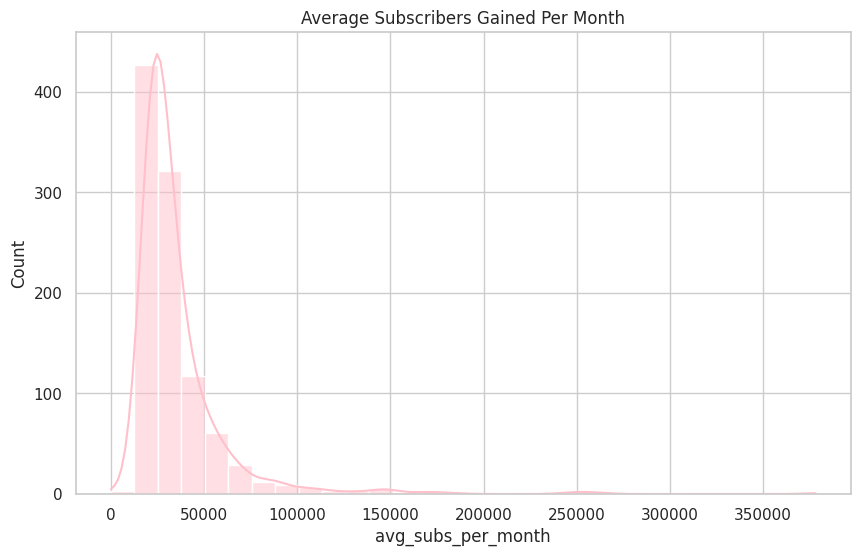

In [31]:
# 20. Average Subscribers Gained Per Month
data['channel_age'] = 2024 - data['created_year']
data['avg_subs_per_month'] = data['subscribers'] / (data['channel_age'] * 12)
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_subs_per_month'].dropna(), bins=30, kde=True, color='pink')
plt.title('Average Subscribers Gained Per Month')
plt.show()
